## Installation

- If you have previous/other manually installed (= not installed via pip) version of OpenCV installed (e.g. cv2 module in the root of Python's site-packages), remove it before installation to avoid conflicts.
- Run these commands
    - pip3 install opencv-python==3.3.0.10
    - pip3 install opencv-contrib-python==3.3.0.10
- Make sure you install OpenCV - 3, SIFT is avaiable only in older versions of OpenCV

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
print(cv2.__version__)

3.3.0


In [31]:
img = cv2.imread('imgs/home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
# sift = cv2.SIFT()
kp = sift.detect(gray,None)

img1 = cv2.drawKeypoints(gray,kp,outImage = None, color=(255,0,0))
cv2.imwrite('sift_keypoints.jpg',img1)

img2 = cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,outImage = None, color=(255,0,0))
cv2.imwrite('sift_keypoints1.jpg',img2)

kp, des = sift.detectAndCompute(gray,None);

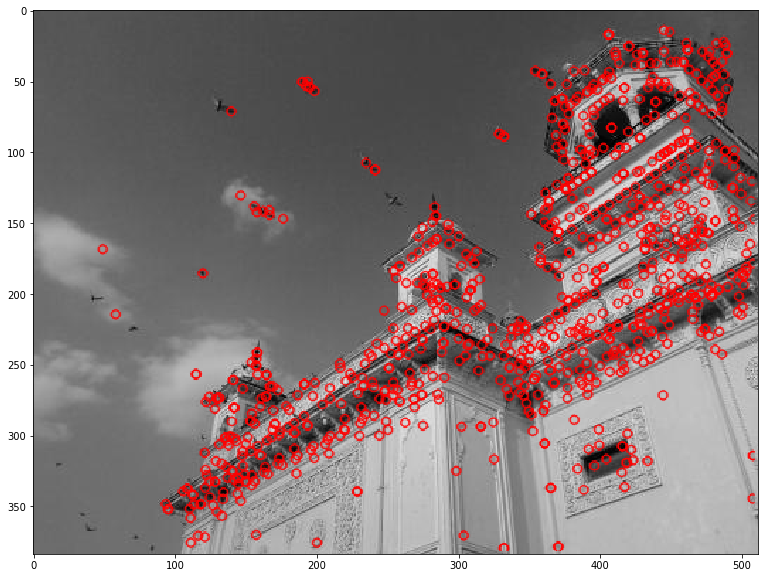

In [32]:
plt.figure(figsize=(15,10));
plt.imshow(img1,cmap = plt.get_cmap('gray'));
plt.show();

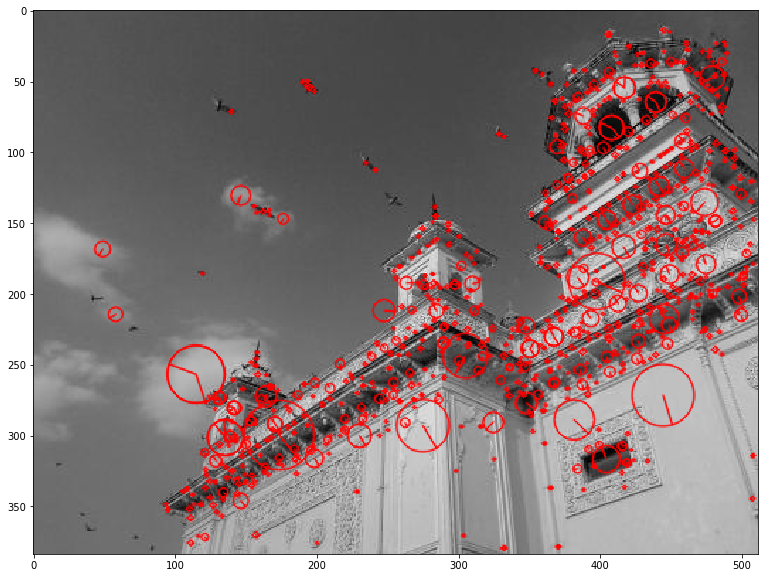

In [33]:
plt.figure(figsize=(15,10))
plt.imshow(img2,cmap = plt.get_cmap('gray'))
plt.show();

## Keypoints of image

In [34]:
print(kp)

[<KeyPoint 0x7f669ed3dcc0>, <KeyPoint 0x7f669ed3d270>, <KeyPoint 0x7f669ece19f0>, <KeyPoint 0x7f669ece1a20>, <KeyPoint 0x7f669ece1a50>, <KeyPoint 0x7f669ece1a80>, <KeyPoint 0x7f669ece1ab0>, <KeyPoint 0x7f669ece1ae0>, <KeyPoint 0x7f669ece1b10>, <KeyPoint 0x7f669ece1b40>, <KeyPoint 0x7f669ece1b70>, <KeyPoint 0x7f669ece1ba0>, <KeyPoint 0x7f669ece1bd0>, <KeyPoint 0x7f669ece1c00>, <KeyPoint 0x7f669ece1c30>, <KeyPoint 0x7f669ece1c60>, <KeyPoint 0x7f669ece1c90>, <KeyPoint 0x7f669ece1cc0>, <KeyPoint 0x7f669ece1cf0>, <KeyPoint 0x7f669ece1d20>, <KeyPoint 0x7f669ece1d50>, <KeyPoint 0x7f669ece1d80>, <KeyPoint 0x7f669ece1db0>, <KeyPoint 0x7f669ece1de0>, <KeyPoint 0x7f669ece1e10>, <KeyPoint 0x7f669ece1e40>, <KeyPoint 0x7f669ece1e70>, <KeyPoint 0x7f669ece1ea0>, <KeyPoint 0x7f669ece1ed0>, <KeyPoint 0x7f669ece1f00>, <KeyPoint 0x7f669ece1f30>, <KeyPoint 0x7f669ece1f60>, <KeyPoint 0x7f669ece1f90>, <KeyPoint 0x7f669ece1fc0>, <KeyPoint 0x7f669ecf8030>, <KeyPoint 0x7f669ecf8060>, <KeyPoint 0x7f669ecf8090>, 

### Number of keypoints detected

In [35]:
len(kp)

889

### x,y co-ordinates of keypoints

In [36]:
for i in kp:
    print(i.pt[0], i.pt[1])

449.08941650390625 14.951162338256836
487.332275390625 21.959993362426758
488.4994201660156 24.397043228149414
461.91961669921875 27.674840927124023
461.91961669921875 27.674840927124023
461.91961669921875 27.674840927124023
445.0812072753906 28.695354461669922
410.6107177734375 29.203853607177734
430.0740966796875 29.90655517578125
430.0740966796875 29.90655517578125
489.5806579589844 30.128280639648438
489.5806579589844 30.128280639648438
411.1963195800781 31.862192153930664
476.5922546386719 32.55508804321289
479.6676025390625 36.1150016784668
413.5791320800781 37.02775192260742
389.10302734375 42.20880889892578
381.5341491699219 42.612003326416016
359.09429931640625 44.74342727661133
359.09429931640625 44.74342727661133
408.0386047363281 47.593902587890625
189.83103942871094 50.25074768066406
189.83103942871094 50.25074768066406
192.20741271972656 52.91144561767578
443.3840026855469 53.33677673339844
434.0407409667969 54.044837951660156
447.9612731933594 54.14619445800781
489.35546

### Size of keypoint : diameter of the meaningful keypoint neighborhood

In [37]:
kp[0].size

2.011176824569702

### Angle of keypoint : computed orientation of the keypoint (-1 if not applicable)

In [38]:
kp[0].angle

189.701416015625

## Keypoint Desciptors

### Description Matrix => No of keypoints * 128

In [39]:
print(des)

[[42.  4.  1. ...  0.  0.  0.]
 [ 3.  3.  4. ...  3. 35.  8.]
 [ 1.  5. 36. ...  0. 60. 56.]
 ...
 [17.  1.  0. ...  0.  0.  5.]
 [28. 12.  1. ...  1.  0.  0.]
 [21.  0.  0. ...  0.  0.  0.]]


In [40]:
des.shape

(889, 128)

In [41]:
des[0].size

128

## Keypoint Matching

In [42]:
import cv2  
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('imgs/t1.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
cv2.imwrite('sift_keypoints2.jpg',img1)

True

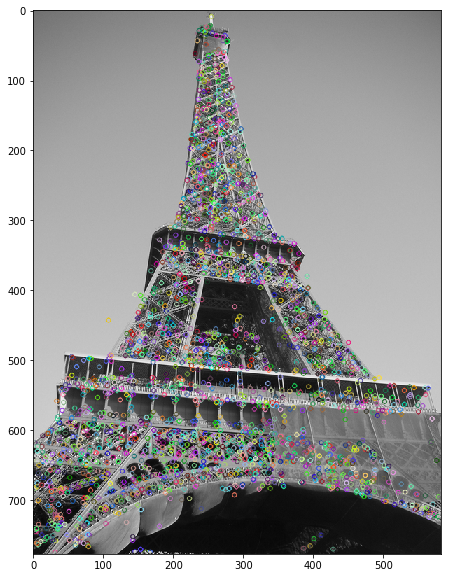

In [43]:
plt.figure(figsize=(15,10))
plt.imshow(img_1,cmap = plt.get_cmap('gray'))
plt.show();

### Example - 1

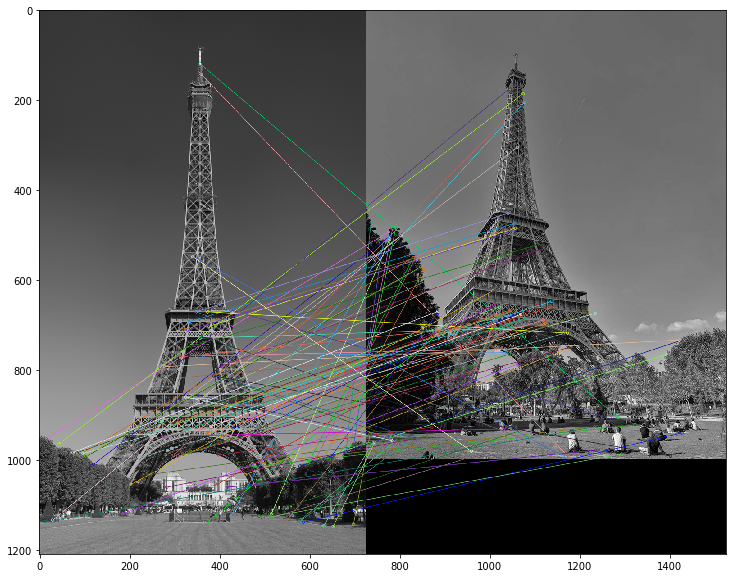

In [44]:
# read images
img1 = cv2.imread('imgs/t2.jpg')  
img2 = cv2.imread('imgs/t3.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3),plt.show()
cv2.imwrite('key_matching.jpg',img3);

### Example - 2

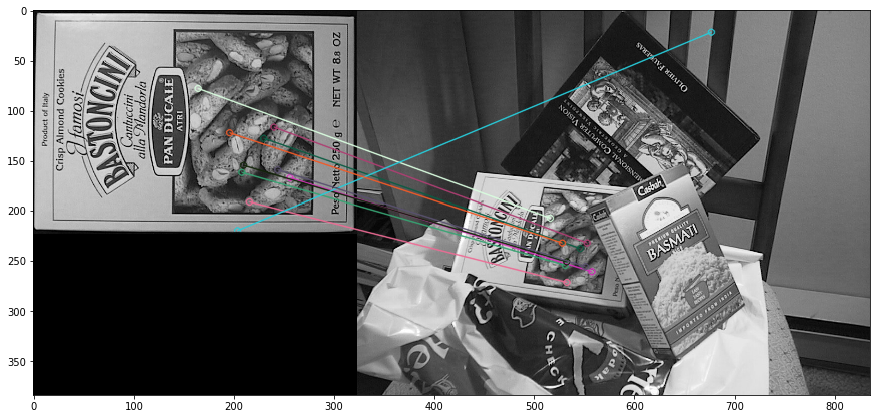

In [45]:
# read images
img1 = cv2.imread('imgs/box.png')  
img2 = cv2.imread('imgs/box_in_scene.png') 

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:10], img2, flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3),plt.show()
cv2.imwrite('key_matching1.jpg',img3);